# Structured Output in LangChain | Generative AI using LangChain | Video 5 

https://youtu.be/y5EmRr1O1h4?list=PLKnIA16_RmvaTbihpo4MtzVm4XOQa0ER0

In LangChain, __structured output__ refers to the practice of having language models return responses in a __well-defined data format (for example, JSON),__ rather than free-form text. 

This makes the model output easier to parse and work with programmatically.

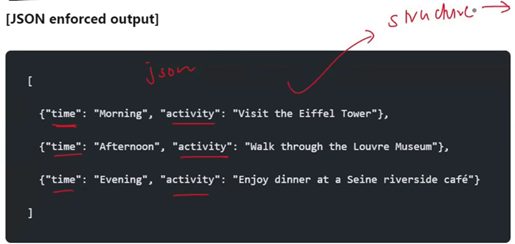

### Why do we need Structured Output

1. Data Extraction : saving in database


2. API building 


3. Agents

## `with_structured_output` : 

- **`with_structured_output`** is a newer pattern (available in frameworks like **LangChain**, **OpenAI SDK**, and other LLM toolkits) that makes it easier to force **structured outputs** directly from an LLM.


- call `with_structured_output` before invoking a function and provide the data format


- It’s a **helper method** that wraps an LLM call so that the output is **automatically parsed/validated** into a **predefined schema or model** (like a Pydantic model, JSON schema, or TypedDict).

Instead of manually prompting `"Output valid JSON with keys X, Y, Z"`, you do this:

```python
from pydantic import BaseModel
from langchain_openai import ChatOpenAI

class Person(BaseModel):
    name: str
    age: int

llm = ChatOpenAI(model="gpt-4o")

structured_llm = llm.with_structured_output(Person)

result = structured_llm.invoke("My name is John and I am 32 years old.")
print(result)   # Person(name="John", age=32)
```

👉 Here, `with_structured_output(Person)` ensures the model **must** return a `Person` object.

### 🔹 Types of `with_structured_output`

Depending on the framework, you can use **different schema definitions**:

### 1. **Pydantic Models**

* Define a schema with `pydantic.BaseModel`.
* Best for Python users.
* Example:

  ```python
  class Product(BaseModel):
      id: int
      name: str
      price: float
  ```

### 2. **JSON Schema**

* You can pass a JSON Schema dict directly.
* Useful if you want **language-agnostic schemas**.
* Example:

  ```python
  schema = {
      "type": "object",
      "properties": {
          "title": {"type": "string"},
          "year": {"type": "integer"}
      },
      "required": ["title", "year"]
  }
  structured_llm = llm.with_structured_output(schema)
  ```

### 3. **TypedDict (Python’s typing)**

* Lightweight option compared to Pydantic.
* Example:

  ```python
  from typing import TypedDict

  class Movie(TypedDict):
      title: str
      rating: float
  ```

### 4. **Function Signatures / Tool Schemas**

* Instead of JSON, you give it a **function signature** (like OpenAI’s function calling).
* Example:

  ```python
  def get_weather(city: str, date: str): ...
  structured_llm = llm.with_structured_output(get_weather)
  ```

### 5. **Other Schema Types (Framework-Specific)**

Some libraries also support:

* **Marshmallow Schemas**
* **Dataclasses**
* **Cerberus schemas**

### 🔹 Why Use `with_structured_output`?

✅ Enforces **valid, structured output** (no broken JSON).
✅ Directly parses into **Python objects**.
✅ Works seamlessly with **OpenAI’s function calling / JSON mode** under the hood.
✅ Reduces post-processing hacks (regex, retry loops).

---

👉 So, in short:
**`with_structured_output`** = LLM call + automatic schema validation.

**Types** = `Pydantic`, `TypedDict`, `JSON Schema`, `Function Signatures`, and sometimes other schema libraries.


## Typeddict 

__TypedDict__ is a way to define a dictionary in Python where you specify what keysand values should exist. It helps ensure that your dictionary follows a specific structure.

### NOTE : even if you give wrong datatype value, it still accepts it


  ```python
  from typing import TypedDict

  class Movie(TypedDict):
      title: str
      rating: float
        
new_movie : Movie = {'title': 'Inception', 'rating' : 9.8}
    
print(new_movie)
  ```

#### Why use TypedDict?

- It tells Python what keys are requiredand what types of valuesthey should have. 


- It does not validate dataat runtime (it just helps with type hints for better coding).

-> simple TypedDict


-> Annotated TypedDict


-> Literal


-> More complex -> with pros and cons

## Pydantic

Pydantic is a data validation and data parsing library for Python. It ensures that the data you work with is correct, structured, and type-safe.

### 🔹 1. **Basic Field Declaration**

Just like normal Python classes:

```python
from pydantic import BaseModel

class Person(BaseModel):
    name: str
    age: int
```

* Variables are declared as **type-annotated attributes**.
* Pydantic automatically validates them at runtime.

```python
p = Person(name="Alice", age=30)   # ✅ works
p = Person(name="Alice", age="30") # ✅ auto-converts "30" → 30
p = Person(name="Alice")           # ❌ error, missing field
```

### 🔹 2. **Optional Fields**

If a variable might be missing, use `Optional` (or give a default).

```python
from typing import Optional

class Person(BaseModel):
    name: str
    age: Optional[int] = None
```

* `age` can be `int` or `None`.
* If not provided, defaults to `None`.

### 🔹 3. **Default Values**

Just assign like in normal Python:

```python
class Person(BaseModel):
    name: str
    age: int = 18  # default value
```

```python
Person(name="Bob")  
# → Person(name='Bob', age=18)
```

### 🔹 4. **Using `Field()` for Extra Metadata**

`Field()` lets you define:

* default values
* descriptions (useful in API docs / OpenAI schemas)
* constraints like min/max

```python
from pydantic import BaseModel, Field

class Person(BaseModel):
    name: str = Field(..., description="Full name of the person")  # required
    age: int = Field(ge=0, le=120, description="Age in years")    # >=0 and <=120
    city: str = Field(default="Unknown")
```

* `...` means **required field**.
* `ge`, `le`, `min_length`, `max_length`, `regex`, etc. enforce constraints.

### 🔹 5. **Complex Types**

You can use lists, dicts, enums, nested models, etc.

### a. List

```python
from typing import List

class Person(BaseModel):
    name: str
    skills: List[str]
```

### b. Dict

```python
from typing import Dict

class Config(BaseModel):
    settings: Dict[str, int]
```

### c. Enum

```python
from enum import Enum

class Job(str, Enum):
    ENGINEER = "engineer"
    DOCTOR = "doctor"

class Person(BaseModel):
    name: str
    job: Job
```

### d. Nested Models

```python
class Address(BaseModel):
    city: str
    zipcode: str

class Person(BaseModel):
    name: str
    address: Address
```

### 🔹 6. **Computed / Derived Fields (v2 feature)**

In **Pydantic v2**, you can add computed fields:

```python
from pydantic import BaseModel, computed_field

class Rectangle(BaseModel):
    width: int
    height: int

    @computed_field
    @property
    def area(self) -> int:
        return self.width * self.height
```

```python
Rectangle(width=5, height=4).area  # → 20
```

### 🔹 7. **Validators (Custom Logic)**

You can enforce custom rules with validators.

### Old style (v1 & v2)

```python
from pydantic import BaseModel, validator

class Person(BaseModel):
    name: str
    age: int

    @validator("age")
    def check_age(cls, value):
        if value < 0:
            raise ValueError("Age must be positive")
        return value
```

### New style (v2)

```python
from pydantic import BaseModel, field_validator

class Person(BaseModel):
    name: str
    age: int

    @field_validator("age")
    def check_age(cls, value):
        if value < 0:
            raise ValueError("Age must be positive")
        return value
```

✅ **Summary: Ways to declare variables in Pydantic**

1. Plain type hints (`name: str`).


2. Optional fields (`Optional[int]`).


3. Default values (`age: int = 18`).


4. `Field()` with metadata/constraints.



5. Complex types (List, Dict, Enum, Nested models).


6. Computed fields.


7. Validators for custom logic.



## 🔹 **When to Use What in Pydantic**

### 1. **Plain Type Hints**

```python
class Person(BaseModel):
    name: str
    age: int
```

* ✅ Use when:

  * The field is **always required**.
  * No defaults or constraints needed.
* ⚠️ Don’t use if the field may be missing or has restrictions.

### 2. **Optional Fields**

```python
from typing import Optional

class Person(BaseModel):
    middle_name: Optional[str] = None
```

* ✅ Use when:

  * The field may not always be present.
  * Example: `middle_name`, `nickname`, `end_date`.
* ⚠️ If you want to enforce optional-but-default, combine with defaults (`= None`).

### 3. **Default Values**

```python
class Person(BaseModel):
    country: str = "India"
```

* ✅ Use when:

  * You want a **sensible default** for missing input.
  * Example: country = "India", status = "active".
* ⚠️ If the default is “magical” or context-specific, better handle it in business logic, not the schema.

### 4. **`Field()` with Metadata/Constraints**

```python
from pydantic import BaseModel, Field

class Person(BaseModel):
    age: int = Field(..., ge=0, le=120, description="Age in years")
```

* ✅ Use when:

  * You need **validation constraints** (`ge`, `le`, `min_length`, `regex`).
  * You want **descriptions** for docs (e.g., FastAPI, OpenAI structured outputs).
* ⚠️ Overuse makes schemas harder to read — use only for fields that truly need constraints.

### 5. **Complex Types**

### List

```python
class Person(BaseModel):
    skills: list[str]
```

* Use for multi-value fields (`skills`, `tags`, `transactions`).

### Dict

```python
class Config(BaseModel):
    settings: dict[str, int]
```

* Use for key-value pairs (`config`, `metadata`, `preferences`).

### Enum

```python
from enum import Enum
class Job(str, Enum):
    ENGINEER = "engineer"
    TEACHER = "teacher"
```

* Use when values are from a **fixed set**.
* Cleaner than `str` + regex checks.

### Nested Models

```python
class Address(BaseModel):
    city: str
    zipcode: str
```

* Use when you want **hierarchical structures** (addresses, items, configs).

### 6. **Computed Fields**

```python
from pydantic import computed_field

class Rectangle(BaseModel):
    width: int
    height: int

    @computed_field
    @property
    def area(self) -> int:
        return self.width * self.height
```

* ✅ Use when:

  * A field is **derived from other fields** (e.g., `area`, `full_name`, `price_with_tax`).
* ⚠️ Don’t use if the value should be **supplied by user** — keep it computed only.

### 7. **Validators**

```python
from pydantic import field_validator

class Person(BaseModel):
    age: int

    @field_validator("age")
    def validate_age(cls, v):
        if v < 0:
            raise ValueError("Age must be positive")
        return v
```

* ✅ Use when:

  * Validation is **too complex** for `Field()` (e.g., cross-field checks, custom rules).
  * Example: start\_date < end\_date, password must contain digits.
* ⚠️ Don’t overuse for simple `min/max` checks — `Field()` is simpler.

## ⚡ Rule of Thumb

* **Always required?** → plain type hint.
* **Sometimes missing?** → `Optional`.
* **Need fallback?** → default value.
* **Need extra validation or docs?** → `Field()`.
* **Nested/structured data?** → Lists, Dicts, Enums, Nested models.
* **Derived values?** → Computed fields.
* **Complex rules?** → Validators.



## When to use what between json, pydantic and typedDict

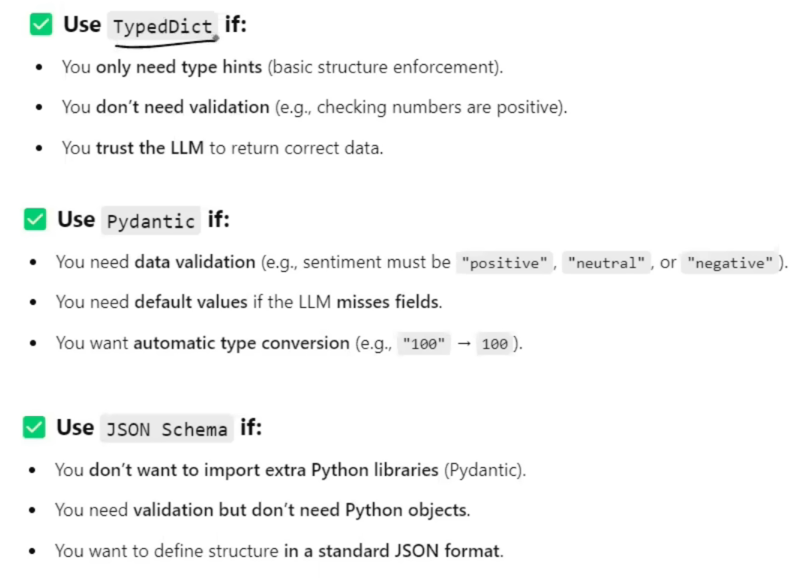

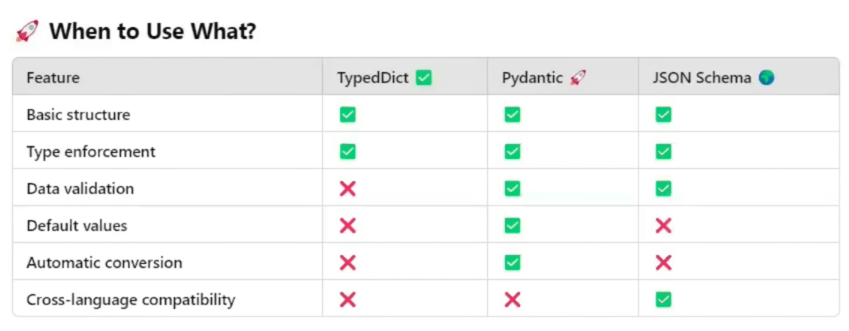

`with_structured_output` has 2 methods inside itself and we can tell the model which we want : 


1. __json mode :__ return structured_output in json format, use when working with gemini or claude



2. __function calling :__ when using OPENAI. also used for Agentic AI for tool calling